<a href="https://colab.research.google.com/github/FabianaFerrente/ibis_pipeline/blob/master/dest_ibis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Mount Google Drive
drive.mount('/content/drive')


shared_folder_path = '/content/drive/MyDrive/dest_IBIS'

# List files in the shared folder
if os.path.exists(shared_folder_path):
    files = os.listdir(shared_folder_path)
    print(f"Files in '{shared_folder_path}':")
    for file in files:
        print(file)
else:
    print(f"Folder '{shared_folder_path}' not found.")

Mounted at /content/drive
Files in '/content/drive/MyDrive/dest_IBIS':
ref_WL.fits
8542_20150518_163819_BB_SO_s000.fits


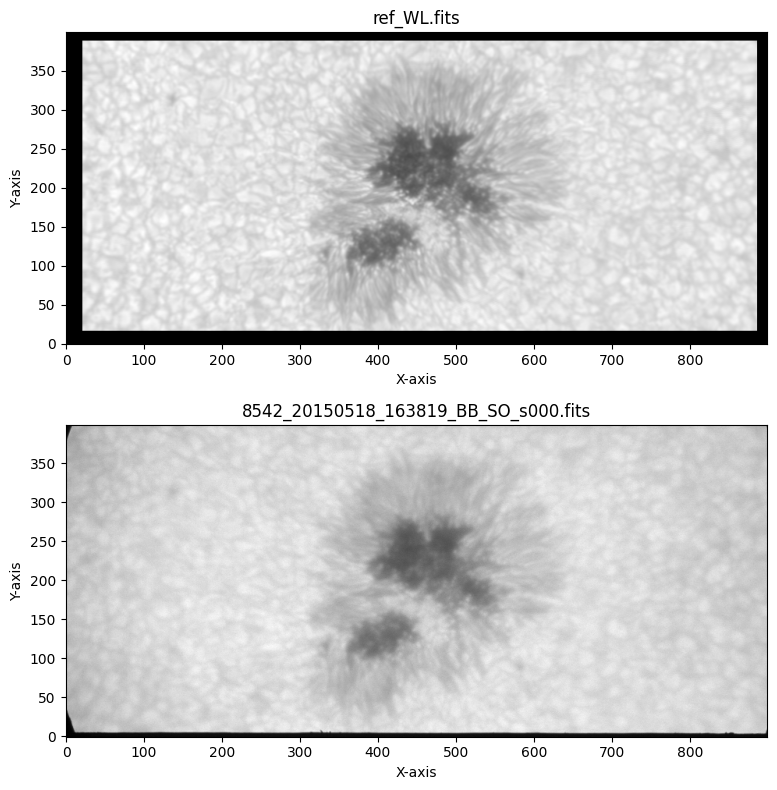

In [2]:
# Define the paths to the FITS files
fits_file_path1 = '/content/drive/MyDrive/dest_IBIS/ref_WL.fits'
fits_file_path2 = '/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits'

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Read and plot the first FITS file
try:
    with fits.open(fits_file_path1) as hdul:
        image_data1 = hdul[0].data
        axes[0].imshow(image_data1[300:700,50:950], origin='lower', cmap='gray',aspect='equal')
        axes[0].set_title('ref_WL.fits')
        axes[0].set_xlabel('X-axis')
        axes[0].set_ylabel('Y-axis')
except FileNotFoundError:
    print(f"Error: FITS file not found at {fits_file_path1}")
except Exception as e:
    print(f"An error occurred with {fits_file_path1}: {e}")

# Read and plot the second FITS file
try:
    with fits.open(fits_file_path2) as hdul:
        image_data2 = hdul[0].data
        axes[1].imshow(image_data2[0,300:700,50:950], origin='lower', cmap='gray', aspect='equal')
        axes[1].set_title('8542_20150518_163819_BB_SO_s000.fits')
        axes[1].set_xlabel('X-axis')
        axes[1].set_ylabel('Y-axis')
except FileNotFoundError:
    print(f"Error: FITS file not found at {fits_file_path2}")
except Exception as e:
    print(f"An error occurred with {fits_file_path2}: {e}")

plt.tight_layout()
plt.show()

In [39]:
print(flow)

[[[-6.3568853e-02 -9.1095321e-02]
  [-5.7473797e-01 -7.8782320e-01]
  [-2.9792998e+00 -2.6306114e+00]
  ...
  [ 2.0464108e+00 -8.4066525e-02]
  [ 2.0556567e+00  5.4306483e-01]
  [ 1.3185536e+00  1.2004410e+00]]

 [[-1.6828960e-01 -2.4469937e-01]
  [-1.5136271e+00 -1.9728276e+00]
  [-4.1443863e+00 -3.0631759e+00]
  ...
  [ 1.3843464e+00 -1.2700425e-02]
  [ 1.4298786e+00  6.1840904e-01]
  [ 8.1107199e-01  1.2818817e+00]]

 [[-4.8899594e-01 -5.1116365e-01]
  [-2.7026799e+00 -2.9081013e+00]
  [-4.4713202e+00 -3.0069888e+00]
  ...
  [ 1.1065353e+00  2.4745710e-02]
  [ 1.1654809e+00  6.5915763e-01]
  [ 5.9453630e-01  1.3265568e+00]]

 ...

 [[-1.5404366e+00 -1.4871563e+01]
  [-1.0559156e+00 -1.3506107e+01]
  [-8.5555738e-01 -1.2950061e+01]
  ...
  [-1.7419573e+00 -6.3219738e+00]
  [-2.0800400e+00 -6.3268881e+00]
  [-2.1499786e+00 -6.4051065e+00]]

 [[-3.2510344e-02 -1.0632549e+01]
  [ 3.4282026e-01 -9.5838919e+00]
  [ 4.4730425e-01 -9.2986660e+00]
  ...
  [-2.0761058e+00 -6.2940998e+00]
  [-

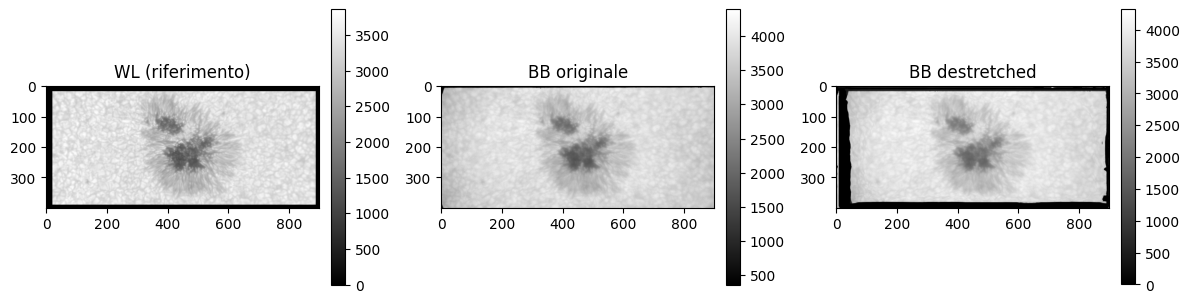

In [71]:

# Carica le immagini dal FITS
with fits.open('/content/drive/MyDrive/dest_IBIS/ref_WL.fits') as hdul:
    wl = hdul[0].data.astype(np.float32)
    wl_crop = wl[300:700, 50:950]


with fits.open('/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits') as hdul:
    bb_cube = hdul[0].data.astype(np.float32)
    bb = bb_cube[0, 300:700, 50:950]  # primo frame, stessa regione






# Calcola il flusso ottico tra WL e BB
flow = cv2.calcOpticalFlowFarneback(wl_crop, bb, None,
                                    pyr_scale=0.5, levels=5, winsize=15,
                                    iterations=5, poly_n=6, poly_sigma=1.2, flags=0)

# Costruisci la mappa di rimappatura
h, w = wl_crop.shape
grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
map_x = (grid_x + flow[..., 0]).astype(np.float32)
map_y = (grid_y + flow[..., 1]).astype(np.float32)

# Applica la correzione
bb_corrected = cv2.remap(bb_norm, map_x, map_y, interpolation=cv2.INTER_LINEAR)
# Visualizza il confronto
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("WL (riferimento)")
im1 = plt.imshow(wl_crop, cmap='gray')
plt.colorbar(im1, fraction=0.046, pad=0.04)

plt.subplot(1,3,2)
plt.title("BB originale")
im2 = plt.imshow(bb, cmap='gray')
plt.colorbar(im2, fraction=0.046, pad=0.04)

plt.subplot(1,3,3)
plt.title("BB destretched")
im3 = plt.imshow(bb_corrected, cmap='gray')
plt.colorbar(im3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()



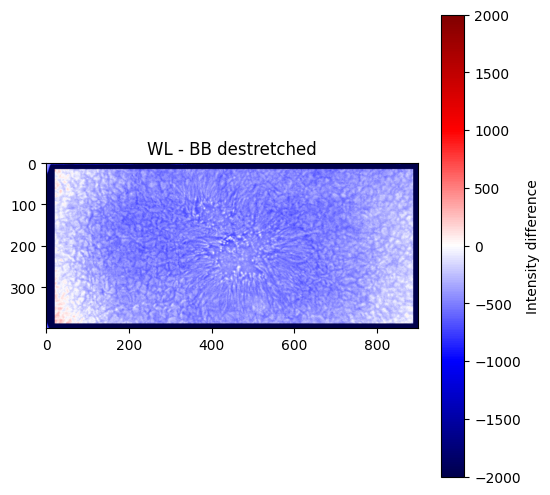

-699.76935
932.93604


In [90]:
# Divide the destretched BB image from the WL image
subtracted_image = wl_crop-bb

# Display the subtracted image
plt.figure(figsize=(6, 6))
plt.title("WL - BB destretched")
plt.imshow(subtracted_image, cmap='seismic', vmin=-2000, vmax=2000)
plt.colorbar(label='Intensity difference')
plt.show()


print(np.mean(subtracted_image))
print(np.std(subtracted_image))

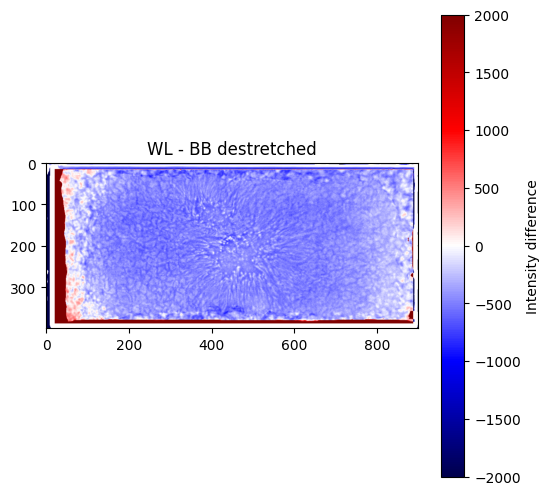

-245.14755
880.73926


In [89]:
# Subtract the destretched BB image from the WL image
subtracted_image = wl_crop - bb_corrected

# Display the divided image
plt.figure(figsize=(6, 6))
plt.title("WL - BB destretched")
plt.imshow(subtracted_image, cmap='seismic', vmin=-2000, vmax=2000)
plt.colorbar(label='Intensity difference')
plt.show()


print(np.mean(subtracted_image))
print(np.std(subtracted_image))

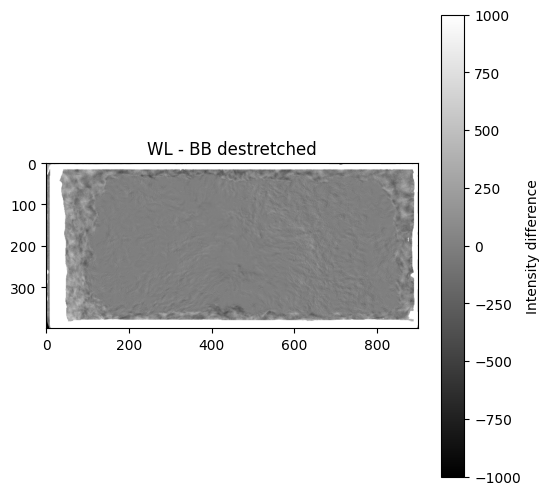

454.6217
1159.4087


In [91]:
# Subtract the destretched BB image from the WL image
subtracted_image = bb - bb_corrected

# Display the divided image
plt.figure(figsize=(6, 6))
plt.title("WL - BB destretched")
plt.imshow(subtracted_image, cmap='gray', vmin=-1000, vmax=1000)
plt.colorbar(label='Intensity difference')
plt.show()


print(np.mean(subtracted_image))
print(np.std(subtracted_image))

TEST THE METHOD

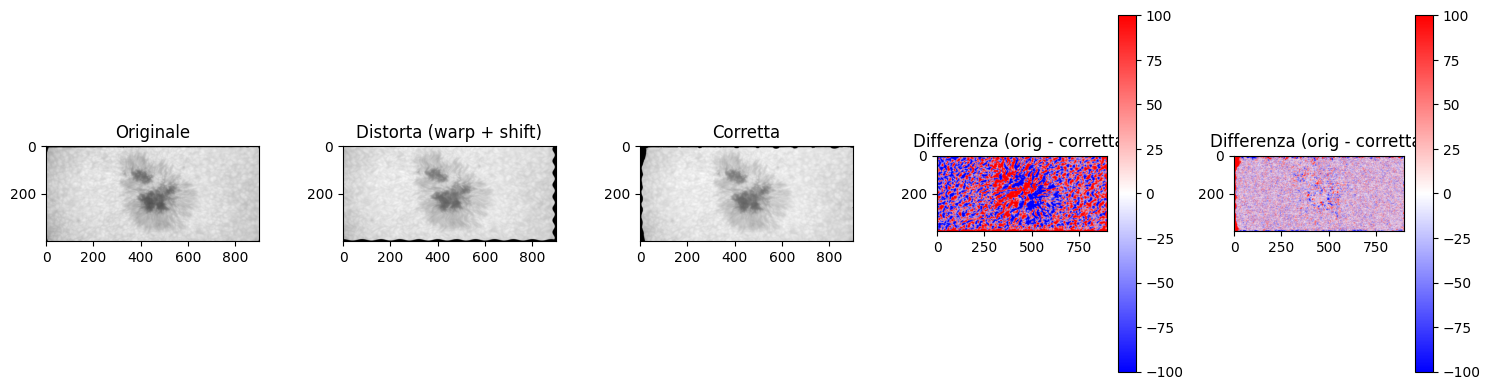

In [100]:



h, w = bb.shape
grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

# Distorsione: traslazione + sinusoidale
dist_x = 5 * np.sin(2 * np.pi * grid_y / 50)   # variazione orizzontale
dist_y = 3 * np.cos(2 * np.pi * grid_x / 80)   # variazione verticale
map_x = (grid_x + dist_x + 10).astype(np.float32)   # +10 pixel shift a dx
map_y = (grid_y + dist_y + 5).astype(np.float32)    # +5 pixel shift in basso

bb_distorted = cv2.remap(bb, map_x, map_y, interpolation=cv2.INTER_LINEAR)

# Calcola flusso ottico tra bb_norm e bb_distorted ---
flow = cv2.calcOpticalFlowFarneback(bb, bb_distorted, None,
                                    pyr_scale=0.5, levels=3, winsize=15,
                                    iterations=5, poly_n=6, poly_sigma=1.2, flags=0)

#  Rimappa la distorta per correggerla ---
map_x_corr = (grid_x + flow[...,0]).astype(np.float32)
map_y_corr = (grid_y + flow[...,1]).astype(np.float32)
bb_corrected = cv2.remap(bb_distorted, map_x_corr, map_y_corr, interpolation=cv2.INTER_LINEAR)

#  Visualizza ---
plt.figure(figsize=(15,4))

plt.subplot(1,5,1)
plt.title("Originale")
plt.imshow(bb, cmap='gray')

plt.subplot(1,5,2)
plt.title("Distorta (warp + shift)")
plt.imshow(bb_distorted, cmap='gray')

plt.subplot(1,5,3)
plt.title("Corretta")
plt.imshow(bb_corrected, cmap='gray')


plt.subplot(1,5,4)
plt.title("Differenza (orig - corretta)")
plt.imshow(bb - bb_distorted, cmap='bwr', vmin=-100, vmax=100)
plt.colorbar()

plt.subplot(1,5,5)
plt.title("Differenza (orig - corretta)")
plt.imshow(bb - bb_corrected, cmap='bwr', vmin=-100, vmax=100)
plt.colorbar()

plt.tight_layout()
plt.show()
